<a href="https://colab.research.google.com/github/Kartikk9650/Machine-Learning/blob/main/CUSTOMER_CHURN_BANK_(MINIPR0JECT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTING PREDEFINED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#**CUSTOMER CHURN PREDICTION ANALYSIS**


In [ ]:
#LOADING THE DATASET
data=pd.read_csv('/content/Churn_Modelling.csv')

### *** DISPLAY TOP 5 ROWS OF THE DATASET**

In [ ]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##**CHECK THE LAST 5 ROWS OF THE DATASET**

In [ ]:
data.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


*** FIND THE SHAPE OF OUR DATASET (NUMBER OF ROWS AND NUMBER OF COLUMNS)**

In [ ]:
data.shape

(10000, 14)

In [ ]:
print("Number of Rows",data.shape[0])
print("Number of Columns ",data.shape[1])

Number of Rows 10000
Number of Columns  14


*** GET INFORMATION ABOUT OUR DATASET LIKE TOTAL NO OF COLUMNS , DATATYPES OF EACH COLUMN AND MEMORY REQUIREMENT ***

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


*** CHECK FOR THE NULL VALUE ***

In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

*** GET OVERALL STATISTICS ABOUT THE DATASET ***

In [ ]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


*** DROPPING IRRELEVANT FEATURES ***

In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
#These columns are irrelavant for prediction as of no use
data=data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


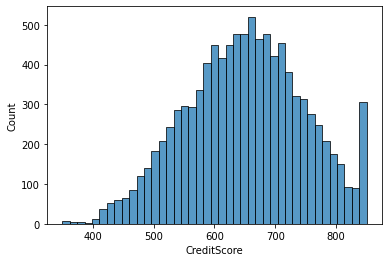

In [ ]:
#Univariate analysis
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x='CreditScore', data=data, )
plt.show()

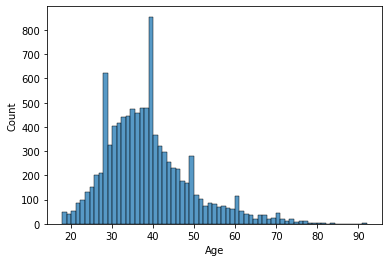

In [ ]:
sns.histplot(x='Age', data=data, )
plt.show()

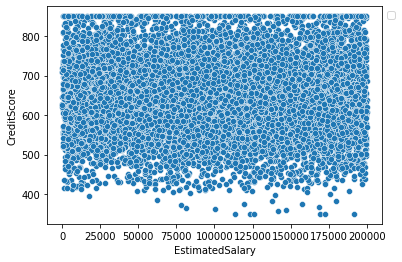

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot( x="EstimatedSalary", y='CreditScore', data=data,)

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


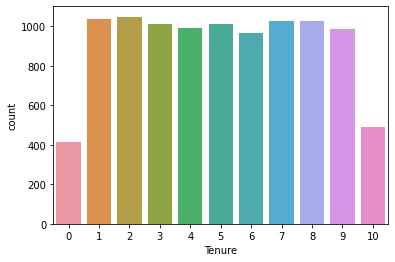

In [ ]:
sns.countplot(data['Tenure'])

**ENCODING CATEGORICAL DATA**

In [ ]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
data=pd.get_dummies(data,drop_first=True)

In [ ]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


**NOT HANDLING IMBALANCED ***

In [ ]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


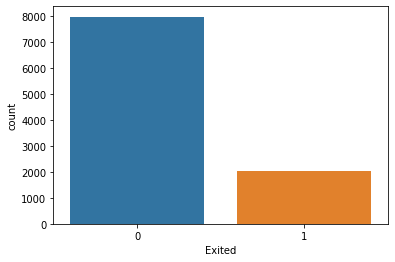

In [ ]:
#Imbalanced Dataset = Target has uneven distribution of observation.
#0 = Person not leaving the bank
#1 = Person leaving the bank
sns.countplot(data['Exited'])

In [ ]:
X=data.drop(['Exited'],axis=1)
y=data['Exited']

In [ ]:
y


0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

*** HANDLING IMBALANCED DATA WITH SMOTE ***

In [ ]:
#OVERSAMPLING AND UNDERSAMPLING TECHNIQUES ARE USED TO HANDLE DATA
#SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE
from imblearn.over_sampling import SMOTE



In [ ]:
X_res,y_res=SMOTE().fit_resample(X,y)

In [ ]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

*** SPLITTING THE DATASET INTO TRAINING AND TESTING ***

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#startify parameter used for imbalanbed dataset
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

**FEATURE SCALING***

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[-0.55099072,  0.90522703, -1.03032304, ..., -0.57263713,
        -0.46413027, -0.84811452],
       [ 1.1001447 ,  0.10231741, -1.40004716, ..., -0.57263713,
        -0.46413027,  1.17908605],
       [-0.7915535 , -0.90131962, -0.66059892, ..., -0.57263713,
        -0.46413027, -0.84811452],
       ...,
       [ 0.20350162,  0.20268111,  1.1880217 , ..., -0.57263713,
        -0.46413027,  1.17908605],
       [-0.26668926,  0.60413592, -0.29087479, ..., -0.57263713,
        -0.46413027, -0.84811452],
       [ 0.53154177,  1.00559073, -1.40004716, ...,  1.74630661,
        -0.46413027,  1.17908605]])

*** LOGISTIC REGRESSION***

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [ ]:
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred1=log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#it is an imbalanced dataset so we will also check the f1 score precision recall
#accuracy_score(y_test,y_pred1)
accuracy_score(y_test,y_pred1)

0.785624607658506

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
#0.58914 before handling imbalanced dataset
precision_score(y_test,y_pred1)

0.7732412060301508

In [ ]:
#0.1867321867
recall_score(y_test,y_pred1)

0.7926593689632968

In [ ]:
#0.28358208
f1_score=(y_test,y_pred1)


**DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4=dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred4)

0.807909604519774

In [ ]:
precision_score(y_test,y_pred4)

0.783946891973446

**16. RANDOM FOREST CLASSIFIER***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred5=rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred5)

0.85969868173258

In [ ]:
precision_score(y_test,y_pred5)

0.85

In [ ]:
len(X_res.columns)

11

**ARTIFICIAL NEURAL NETWORK***

In [ ]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(11,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=10)

Epoch 1/10
399/399 [==============================] - 1s 2ms/step - loss: 0.5310 - accuracy: 0.7373
Epoch 2/10
399/399 [==============================] - 1s 2ms/step - loss: 0.4423 - accuracy: 0.7951
Epoch 3/10
399/399 [==============================] - 1s 2ms/step - loss: 0.4235 - accuracy: 0.8058
Epoch 4/10
399/399 [==============================] - 1s 2ms/step - loss: 0.4102 - accuracy: 0.8133
Epoch 5/10
399/399 [==============================] - 1s 2ms/step - loss: 0.4018 - accuracy: 0.8176
Epoch 6/10
399/399 [==============================] - 1s 2ms/step - loss: 0.3962 - accuracy: 0.8230
Epoch 7/10
399/399 [==============================] - 1s 1ms/step - loss: 0.3928 - accuracy: 0.8237
Epoch 8/10
399/399 [==============================] - 1s 2ms/step - loss: 0.3901 - accuracy: 0.8249
Epoch 9/10
399/399 [==============================] - 1s 2ms/step - loss: 0.3883 - accuracy: 0.8255
Epoch 10/10
399/399 [==============================] - 1s 2ms/step - loss: 0.3869 - accuracy: 0.8280

**17. GRADIENT BOOSTING CLASSIFIER ***

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc=GradientBoostingClassifier()

In [ ]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred6=gbc.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred6)

0.844632768361582

In [ ]:
final_data=pd.DataFrame({'Models':['LR','DT','RF','GBC'],
                         'ACC':[accuracy_score(y_test,y_pred1),
                                accuracy_score(y_test,y_pred4),
                                accuracy_score(y_test,y_pred5),
                                accuracy_score(y_test,y_pred6)]})

In [ ]:
final_data

,Models,ACC
0,LR,0.785625
1,DT,0.807910
2,RF,0.859699
3,GBC,0.844633


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


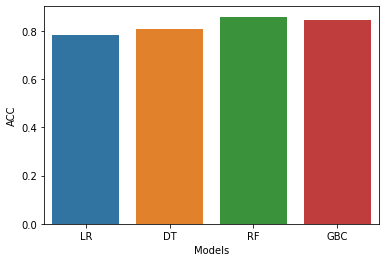

In [ ]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [ ]:
FInal_data=pd.DataFrame({'Models':['LR','DT','RF','GBC'],
                         'PRE':[precision_score(y_test,y_pred1),
                                precision_score(y_test,y_pred4),
                                precision_score(y_test,y_pred5),
                                precision_score(y_test,y_pred6)]})

In [ ]:
final_data

,Models,ACC
0,LR,0.785625
1,DT,0.807910
2,RF,0.859699
3,GBC,0.844633


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


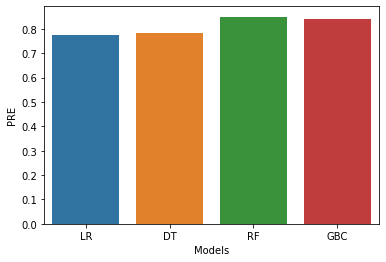

In [ ]:
sns.barplot(final_data['Models'],FInal_data['PRE'])

**18. SAVE THE MODEL ***

In [ ]:
X_res=sc.fit_transform(X_res)


In [ ]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [ ]:
!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


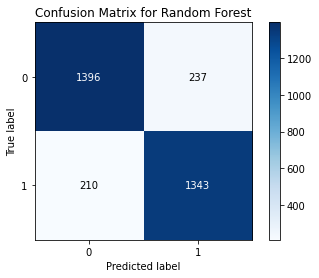

In [ ]:
from sklearn.model_selection import cross_val_predict, train_test_split
import matplotlib.pyplot as plt

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred5, normalize=False, title = 'Confusion Matrix for Random Forest')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1633
           1       0.85      0.86      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



In [ ]:
import joblib

In [ ]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [ ]:
model=joblib.load('churn_predict_model')

In [ ]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [ ]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1])

# **GUI***

In [ ]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
def show_entry_fields():
  p1=int(e1.get())
  p2=int(e1.get())
  p3=int(e1.get())
  p4=float(e1.get())
  p5=int(e1.get())
  p6=int(e1.get())
  p7=int(e1.get())
  p8=float(e1.get())
  p9=int(e1.get())
  if p9==1:
    Geography_Germany=1
    Geography_Spain =0
    Geography_France=0
  elif p9==2:
    Geography_Germany=0
    Geography_Spain =1
    Geography_France=0
  elif p9==3:
    Geography_Germany=0
    Geography_Spain =0
    Geography_France=1
  p10=int(e10.get())
  model=joblib.load('churn_model')
  result =model.predict(sc.transform([p1,p2,p3,p4,p5,p6,p7,p8,Geography_Germany,Geography_Spain,p10]))

  if result ==0:
      Label(master,text="No Exit").grid(row=31)
  else:
      Label(master,text="Exit").grid(row=31)

master= Tk()
master.title("Bank Customers Prediction using Machine Learning")

label=Label(master, text = "Customer Churn Prediction Using ML",
            bg="black",fg="white").   \
            grid(row=0,columnspan=2)

Label(master,text="CreditScore").grid(row=1)
Label(master,text="Age").grid(row=2)
Label(master,text="Tenure").grid(row=3)
Label(master,text="Balance").grid(row=4)
Label(master,text="NumOfProducts").grid(row=5)
Label(master,text="HasCrCard").grid(row=6)
Label(master,text="IsActiveMember").grid(row=7)
Label(master,text="EstimatedSalary").grid(row=8)
Label(master,text="Geography").grid(row=9)
Label(master,text="Gender").grid(row=10)

e1= Entry[master]
e2= Entry[master]
e3= Entry[master]
e4= Entry[master]
e5= Entry[master]
e6= Entry[master]
e7= Entry[master]
e8= Entry[master]
e9= Entry[master]
e10= Entry[master]

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)

Button(master, text='predict',command =show_entry_fields).grid()
mainloop()

TclError: ignored